# COGS 118A - Final Project

# Food Recognition

# Names 
- Joshua Garcia
- Rey Mendoza
- Ryan Burden
- Terence Ting

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


In [15]:
#All of the packages we used!
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import json
import numpy as np
import cv2
from matplotlib import pyplot

### Imports for CNN ### 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

### Imports for KNN ###
from os import listdir
from os.path import isfile, join
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

#Ensure the food directory is in the same folder as this code
dir = "C:/food-101/food-101/images/" ####################
# dir = "food-101/food-101/images/"
categories = os.listdir(dir)
PhotosByCategory = []
Categories = ""
for b in os.listdir(dir):
    if(b != '.DS_Store'):
        Categories = Categories + str(b) + ", "
        photos = []
        for a in os.listdir(dir + b):
            photos.append(b + "/" + a)
        PhotosByCategory.append(photos)
print(len(PhotosByCategory[1]))
#photosByCategory contains all categories by number ie. PhotosByCategory[0] = apple_pie directory


def imOpen(path):
    imPath = dir + path
    img = mpimg.imread(imPath)
    return img


1000


# EDA

In [ ]:
categories = open('food-101/food-101/meta/classes.txt').read().split()
categories

test = json.load(open('food-101/food-101/meta/test.json'))
train = json.load(open('food-101/food-101/meta/train.json'))

count_test = np.array(list(test.values()))
print('Number of Test Images:', count_test.shape[0] * count_test.shape[1])

count_train = np.array(list(train.values()))
print('Number of Train Images:', count_train.shape[0] * count_train.shape[1])

whole = {}
for key in test.keys():
    whole[key] = test[key]
    whole[key] += train[key]

count_whole = np.array(list(whole.values()))
print('Total Number of Images:',
      count_whole.shape[0] * count_whole.shape[1], '\n')

print('Number of categories:', len(categories))
print('Number of photos per category:', len(whole['apple_pie']))
print('List of categories:', categories)

plt.imshow(imOpen(train[categories[0]][0] + '.jpg'))


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Results

### SVM
In this section we will go into detail of how we attempted to use a SVM model to perform image recognition.

Before we continue we should note a few design choices about our model.
* First we only used 5 food categories each of 1000 images where we used a 70/30 training/testing split.
* Second, each image was of size 50x50
* Each category was randomly sampled from the set of 101 food categories and the images were inserted at a random order to ensure a true unbiased sample of the dataset. 
* Food categories are shown below in the following code block
* Note we did use a random seed so we could recreate the results for debugging and presentation purposes (We arbitirarily used the seed value (2))
* The reason why we didn't use the full dataset and used a smaller image was due to the exponential run time of our SVM, using anything more than 5000 images with a higher image size larger than 50x50 resulted in a runtime that was realistically unreasonable scaling upwards of over 24 hours.

We have included the code for the random selection below as well as the code that prepares the data for the SVM model.

In [23]:

#DATASET IS TOO LARGE AHHH
#TIME TO RANDOM SAMPLE
#Select number of images to be random sampled
numCategories = 5
#Select order of images and how many images to use per category.
randomSampleCount = 1000

cutCategories = []
index = 0
#Random Generator for categories
random.seed(2)
Catsequence = [i for i in range(len(categories))]
#Here we randomly select the index of the numCategories desired
CatrandList = random.sample(Catsequence, numCategories)

index = 0
#Here we get the categories we randomly selected
for cat in categories:
    if(index in CatrandList):
        cutCategories.append(cat)

    index = index + 1


sequence = [i for i in range(1000)]
randList = random.sample(sequence, randomSampleCount)
#Now here we get the images from those categories and we grab the images from that dataset
randomSampled = []
scaleddir = 'food-101/food-101/imagesScaled/' 
for cat in cutCategories:
    directory = scaleddir + cat
    path = os.listdir(directory)
    index = 0
    imagesToBeSampled = []
    for images in path:
        index = index + 1
        if(index in randList):
            imagesToBeSampled.append(images)
    randomSampled.append(imagesToBeSampled)

print(cutCategories)

#############SVM DATA PROCESSING#############
from sklearn.preprocessing import MinMaxScaler
flat = []
images2 = []
#Resized array ***CRITICAL USE RESIZED ARRAY
scaleddir = 'food-101/food-101/imagesScaled/' 

#This gets all images and puts them into a dataframe
#DESIGN NOTES
#Changes image size to 50x50 due to processign speed. 250x250 increases processing time by 30% which scales exponentially.
index = 0
for cat in cutCategories:
    directory = scaleddir + cat    
    path = randomSampled[index]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        #Here we resize the image to reduce the data we need to process to save on processing time.
        img_resized = resize(toArr, (50, 50, 3))
        flat.append(img_resized.flatten())
        images2.append(Categories.index(cat))
flattened = np.array(flat)
images_arr = np.array(images2)
df = pd.DataFrame(flattened)
df['Target'] = images_arr

#Here we create our test to data split
#Default is 30
ts = .30
rs = 45
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=rs, stratify=y)


#Next we scale the data. This is to improve processing time and does not affect the quality of our data. Some what of a hack with SVM.
#Note without this we can observe a 20% increase in processin time.
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)
print("Number of training data: " + str(len(x_train)))
print("Number of testing data: " + str(len(x_test)))






['bibimbap', 'bruschetta', 'caesar_salad', 'chocolate_cake', 'garlic_bread']
Number of training data: 3496
Number of testing data: 1499


Here we show the example of what each type of food looks like!

This is an example of a bibimbap


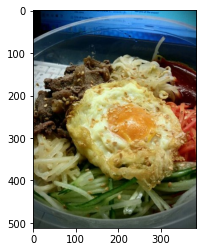

In [24]:
plt.imshow(imOpen(train[categories[CatrandList[0]]][0] + '.jpg'))
print("This is an example of a bibimbap")


This is an example of a caesar salad


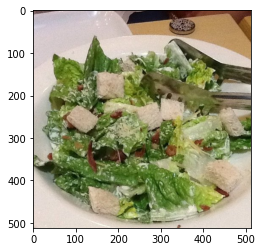

In [29]:
plt.imshow(imOpen(train[categories[CatrandList[1]]][0] + '.jpg'))
print("This is an example of a caesar salad")


This is an example of a bruschetta


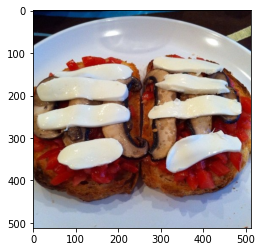

In [28]:
plt.imshow(imOpen(train[categories[CatrandList[2]]][0] + '.jpg'))
print("This is an example of a bruschetta")


This is an example of a garlic bread


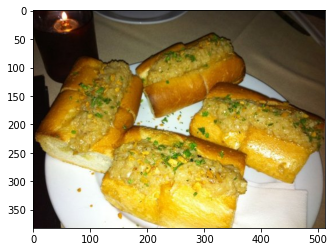

In [27]:
plt.imshow(imOpen(train[categories[CatrandList[3]]][0] + '.jpg'))
print("This is an example of a garlic bread")


This is an example of a chocolate cake


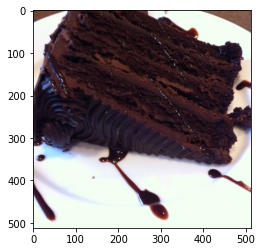

In [26]:
plt.imshow(imOpen(train[categories[CatrandList[4]]][0] + '.jpg'))
print("This is an example of a chocolate cake")


Now that we have discussed how we selected the data used for this model we want to discuss how we performed the model. Since we are working with images we know that these images will result in higher dimensionality, this results in a complication of how we handle this data, we decided that the two best models that would work with svm are RBF and linear kernels. The reason why we focused primarily on RBFs is due to two reasons,
* First RBF's are able to handle large amounts of data by simply only using the data that is needed to store Support vectors which helps tremendusly to reduce training time space complexity
* Second, RBF's are fairly effective in data with large dimensionality (something that other machine learning models like KNN's fail with), with our type of image data, we needed a model that supported high dimensionality

As for the linear kernel we discovered that it is very inaccurate when it comes to prediction with image data, where it resulted with an overall accuracy of less than 5%. This does make sense since linear kernels rely on the data being linearly seporable which gets quite complex with image data.

We also decided to use the C parameters 1, 10, and 100 to test out different misclassification error rates, we found that the parameter 10 was the most effective at generating the least amount of misclassification errror since it results in a good balance in terms of the tightness of the cutoff value from the decision boundary.

Finally we tried the gamma values .0001, .001 and .01 to define how much each data point should influence training data, we found that the value .0001 was the most effective in training since we had an abundance of data available. We found that since we had so much data, percisely 50*50*3*5000(37467495) features to consider, the 50x50x3 was the number of pixels per image, and the 5000 was the number of images we used for training/testing. 

Once we trained our model, using pickle we saved it so that we could perform further analysis without having to rerun the code again.

Our SVM model code is shown below

In [8]:
#This is our svm model. It took 456 minutes to run on 3496 training images.capitalize

#NOTE Don't uncomment this code, it will take a long time to run. Shown below is the value that is printed after running this code.

#params = {'C': [1,10,100], 'gamma': [0.0001,.001,.01], 'kernel': ['rbf','linear']}
#svm2 = svm.SVC(probability=True)
#print("Please wait...")
#model = GridSearchCV(svm2, params)
#model.fit(x_train, y_train)
#print('The best params are')
#model.best_params_
#pickle.dump(model, open('svmModel2.p', 'wb'))
print("The best params are {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}")


The best params are {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


Now below we will do a bit of metric analysis as shown in each code block below.

In [11]:
model = pickle.load(open('svmModel2.p', 'rb'))
y_pred = model.predict(x_test)
print("SVM's accuracy is " + str(accuracy_score(y_pred, y_test)*100%))


SVM's accuracy is {64.04131697869593}


As you will observe we managed to achieve an accuracy of around 64%, now while this isn't an incredibly accurate model it is still within expected performance from this type of model. Especially since it sufferes from the issue of large datasets, SVM's training time scales as you add more data, as a matter of fact, after doing some calculations we discovered that if we used all 101 food categories at 1000 images each at a size of 150x150, it would've resulted in a training time of over 40 days!

However, for relatively small datasets, SVM's are able to make really good predictions, We tried running an SVM with only 3 food categories at 300 images each and it was able to achieve an accuracy of almost 80% which begins to make more sense as we look at it in more detail. With enough training data the model is able to make really accurate decision boundaries from small datasets with features that do not overlap.

However, in our model the limitations of SVM shows as you can observe that some of the data does have overlapping features such as shape or color!

Below we generate the classification report going into more detail of our SVM's performance

In [14]:
a = classification_report(y_pred, y_test)
word = ""
for let in a:
    if let != '\n':
        word = word + let
    else:
        print(word)
        word = ""
print()
print(confusion_matrix(y_pred, y_test))


              precision    recall  f1-score   support

          88       0.69      0.66      0.67       328
         132       0.54      0.55      0.55       306
         144       0.66      0.65      0.66       317
         280       0.71      0.75      0.73       295
         612       0.59      0.60      0.59       303

    accuracy                           0.64      1549
   macro avg       0.64      0.64      0.64      1549
weighted avg       0.64      0.64      0.64      1549

[[215  30  31  21  31]
 [ 24 168  22  42  50]
 [ 26  30 206  17  38]
 [ 15  38  12 221   9]
 [ 30  43  39   9 182]]


From the cell above you'll observe several interesting points, First is the result that our best food categories were the first and fourth one (bibimbap and chocolate cake). In general our results are relatively remarkable for the amount of data that the SVM had to process. In general if we had to use this method as a image classification algorithm, we would argue that it would be best in a case of determining the difference between two classes rather than introducing lot's of different cases. In the situation where we presented it with 5 different food classes all with varying shapes, colors and sizes where there was overlapping features still performed relatively well. 

In the real world, we would not use this model since image classificaiton can have devastating consequences (Misidentifying a person or object) such as a a 45% failure to identify true positives as shown in the recall rate for the second image class.However in the means of learing, the results of this model and how it processed image data was impressive regardless of the limitations. 

### KNN
In this section we will detail our process for using KNN to attempt to perform classification on a subset of food images.

Similarly to our SVM model:

- We only used 5 food categories, each containint 1000 images where we created a 70/30 training/test split.
- Each image was of size 50x50 as KNN does not do well with high dimensional data and the original 250x250 (plus 3 color channels) would result in 187,500 features.
- Each category was randomly sampled from the full set of 101 categories.
- This model uses the random seed 118 to reproduce results.
- While the KNN training runtime was significantly faster than that of SVM, we still chose to train the model on only five categories to maintain consistency between models and for ease of comparison later on.

Below is the code that randomly samples 5 categories from the entire list of food categories and processes the images into a dataframe. This dataframe of image data is then split into train and test sets to be used in the KNN model.

In [13]:
random.seed(118)
categories = open('food-101/food-101/meta/classes.txt').read().split()
test = json.load(open('food-101/food-101/meta/test.json'))
train = json.load(open('food-101/food-101/meta/train.json'))

# KNN Work
flat = []
images2 = []
# Resized array ***CRITICAL USE RESIZED ARRAY
scaleddir = 'food-101/food-101/imagesScaled/'

# This gets all images and puts them into a dataframe
# DESIGN NOTES
# Changes image size to 50x50 due to processign speed.
# KNN does not work well with high dimensional data so, 250x250 is too much
index = 0
for cat in random.sample(categories, 5): #categories[:50]:
    print(f'processing category {index}: {cat}...')
    directory = scaleddir + cat    
    # path = randomSampled[index]
    path = [f for f in listdir(directory) if isfile(join(directory, f))]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        img_resized = resize(toArr, (50, 50, 3))
        flat.append(img_resized.flatten())
        images2.append(cat)

print('converting image data into dataframe...')
df = pd.DataFrame(np.array(flat))
print('appending category name to dataframe...')
df['Target'] = np.array(images2)

#Here we create our test to data split, Default is 30
ts = .30
rs = 45
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('Splitting into train and test sets...\n')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=rs, stratify=y)

print("Number of training data: " + str(len(x_train)))
print("Number of testing data: " + str(len(x_test)))

processing category 0: spaghetti_carbonara...
processing category 1: pulled_pork_sandwich...
processing category 2: churros...
processing category 3: foie_gras...
processing category 4: cannoli...
converting image data into dataframe...
appending category name to dataframe...
Splitting into train and test sets...

Number of training data: 3500
Number of testing data: 1500


For our KNN classifier, we opted to search through a range of k from 1 to 20 with a step size of 2, resulting in 10 separate models, each with 4 folds.

In [16]:
knn = KNeighborsClassifier()
k_range = list(range(1, 20, 2))
param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(x_train, y_train)

print('\nThe best params are:', grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("KNN Training Acccuracy: {:.2f}%".format(accuracy))

knn2 = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn2.fit(x, y)
y_test_hat=knn2.predict(x_test)
train_pred = knn2.predict(x_train)
test_accuracy=np.mean(y_test_hat == y_test)*100 # accuracy_score(y_test,y_test_hat)*100
print("KNN Testing Accuracy: {:.2f}%".format(test_accuracy))

Fitting 4 folds for each of 10 candidates, totalling 40 fits

The best params are: {'n_neighbors': 5}
KNN Training Acccuracy: 29.94%
KNN Testing Accuracy: 47.80%


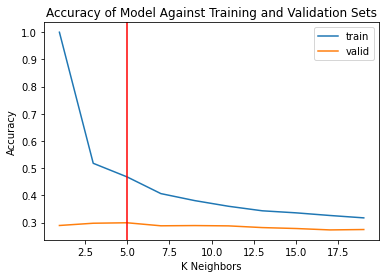

In [36]:
index = grid.param_grid['n_neighbors']
train = grid.cv_results_['mean_train_score']
valid = grid.cv_results_['mean_test_score']
pd.DataFrame({'train': train, 'valid': valid}, index=index).plot()
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.axvline(x=grid_search.best_params_['n_neighbors'], color='red')
plt.title('Accuracy of Model Against Training and Validation Sets');

From this, we can see that our best performing KNN model had 5 `n_neighbors` and achieved an accuracy of around 47%. What's interesting is that the training accuracy is *lower* than the testing accuracy at around 29%. Both of these seem to be at least better than random chance, where we would expect to see roughly 20% accuracy for five categories (1 / # of categories).

Plotting the predictions for the training and test sets alongside the actual data may give us an insight into what is going on.

Training Accuracy
                       precision    recall  f1-score   support

             cannoli       0.59      0.47      0.52       867
             churros       0.22      0.74      0.34       213
           foie_gras       0.48      0.55      0.51       607
pulled_pork_sandwich       0.16      0.77      0.26       143
 spaghetti_carbonara       0.91      0.38      0.54      1670

            accuracy                           0.47      3500
           macro avg       0.47      0.58      0.44      3500
        weighted avg       0.68      0.47      0.51      3500


Testing Accuracy
                       precision    recall  f1-score   support

             cannoli       0.65      0.46      0.54       422
             churros       0.20      0.62      0.30        96
           foie_gras       0.47      0.60      0.53       235
pulled_pork_sandwich       0.16      0.84      0.27        57
 spaghetti_carbonara       0.91      0.39      0.55       690

            accuracy       

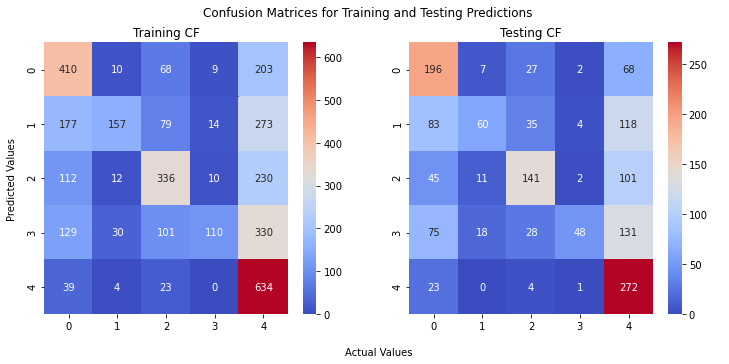

In [17]:
print('Training Accuracy\n', classification_report(train_pred, y_train))
print('\nTesting Accuracy\n', classification_report(y_test_hat, y_test))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Confusion Matrices for Training and Testing Predictions')

cf_matrix = confusion_matrix(y_train, train_pred)
sns.heatmap(cf_matrix, fmt="d", annot=True, cmap='coolwarm', ax=axes[0])
axes[0].title.set_text('Training CF')

cf_matrix = confusion_matrix(y_test, y_test_hat)
sns.heatmap(cf_matrix, fmt="d", annot=True, cmap='coolwarm', ax=axes[1])
axes[1].title.set_text('Testing CF')

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("\nActual Values")
plt.ylabel("Predicted Values");

We can see that, in both the training and testing datasets, the KNN model usually prefers to predict around three of the five categories, leaving two categories with fewer predictions than the rest. This can be determined by the low precision scores for the `churros`, `foie_gras`, and `pulled_pork_sandwich` categories, indicating a higher rate of false positives predictions.

But is this trend the same across different groups of categories? Since we randomly chose 5 categories to train the KNN model on, perhaps we randomly selected a particularly difficult group of categories to train on. We can run many iterations of the above code and see if they have similar relationships between training and testing accuracies.

In [18]:
def createRandomData():
    flat = []
    images2 = []
    scaleddir = 'food-101/food-101/imagesScaled/'

    index = 0
    cat_list = random.sample(categories, 5)
    for cat in cat_list: 
        directory = scaleddir + cat    
        path = [f for f in listdir(directory) if isfile(join(directory, f))]
        index = index + 1
        for images in path:
            toArr = imread(os.path.join(directory, images))
            img_resized = resize(toArr, (50, 50, 3)) 
            flat.append(img_resized.flatten())
            images2.append(cat)

    df = pd.DataFrame(np.array(flat))
    df['Target'] = np.array(images2)

    ts = .30
    rs = 45
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=rs, stratify=y)

    return x_train, x_test, y_train, y_test, x, y, cat_list

def runKNN(x_train, x_test, y_train, y_test, x, y, cat_list):
    
    knn = KNeighborsClassifier()
    k_range = list(range(1,21, 2))
    param_grid = dict(n_neighbors = k_range)

    grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy')
    grid_search = grid.fit(x_train, y_train)

    best_param = grid_search.best_params_

    knn2 = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
    knn2.fit(x, y)
    y_test_hat = knn2.predict(x_test) 
    y_train_hat = knn2.predict(x_train)
    train_accuracy = np.mean(y_train_hat == y_train)*100
    test_accuracy = np.mean(y_test_hat == y_test)*100 
    multi_confusion_matrix = multilabel_confusion_matrix(y_test, y_test_hat, labels=cat_list)
    full_cfmatrix = confusion_matrix(y_test, y_test_hat)
    
    return best_param, train_accuracy, test_accuracy, knn2, multi_confusion_matrix, full_cfmatrix

In [19]:
# # SAVED IN PICKLE
# accuracies = []
# train_accuracies = []
# params = []
# cats = []
# c_matrices = []
# full_cfmatrices = []

# for i in range(100):
#     print(f'Processing Epoch {i}...')
#     x_train, x_test, y_train, y_test, x, y, cat_list = createRandomData()
#     cats.append(cat_list)
#     best_param, train_accuracy, test_accuracy, knn, confusion_matrices, full_cfmatrix = runKNN(x_train, x_test, y_train, y_test, x, y, cat_list)
#     full_cfmatrices.append(full_cfmatrix)
#     c_matrices.append(confusion_matrices)
#     accuracies.append(test_accuracy)
#     train_accuracies.append(train_accuracy)
#     params.append(best_param['n_neighbors'])
#     print(f'Epoch {i}: {test_accuracy}% Accuracy at {best_param["n_neighbors"]} Neighbors\n')

# data = pd.DataFrame({'train_accuracy': train_accuracies,
#                      'test_accuracy':accuracies,
#                      'parameters':params,
#                      'categories': cats,
#                      'confusion matrices': c_matrices,
#                      'confusionMatrix': full_cfmatrices
#                     })

# for i in list(range(5)):
#     data[f'category{i}'] = data['categories'].str[i]
#     data[f'cf{i}'] = data['confusion matrices'].str[i]

# data = data.drop(columns=['categories', 'confusion matrices'], axis=1)
# data.to_pickle('knn_trials.pkl')

After running the above code, we pickle the dataframe so we do not have to rerun the time-consuming test. Below is the dataframe containing the `train_accuracy`, `test_accuracy`, 5 categories and their confusion matrices, the overall `confusionMatrix`, as well as the optimal number of K used to train on those 5 specific categories. 

In [20]:
data = pd.read_pickle('knn_trials.pkl')
data.head()

,train_accuracy,test_accuracy,parameters,confusionMatrix,category0,cf0,category1,cf1,category2,cf2,category3,cf3,category4,cf4
0,37.000000,37.400000,11,"[[223, 46, 14, 2, 15], [101, 146, 41, 3, 9], [...",apple_pie,"[[646, 554], [77, 223]]",crab_cakes,"[[1093, 107], [198, 102]]",pancakes,"[[1125, 75], [228, 72]]",cheesecake,"[[1008, 192], [154, 146]]",greek_salad,"[[1189, 11], [282, 18]]"
1,38.028571,41.866667,19,"[[121, 121, 6, 15, 37], [5, 249, 11, 13, 22], ...",falafel,"[[1157, 43], [241, 59]]",tacos,"[[1081, 119], [189, 111]]",bread_pudding,"[[571, 629], [51, 249]]",prime_rib,"[[1147, 53], [212, 88]]",bibimbap,"[[1172, 28], [179, 121]]"
2,100.000000,100.000000,1,"[[300, 0, 0, 0, 0], [0, 300, 0, 0, 0], [0, 0, ...",paella,"[[1200, 0], [0, 300]]",ravioli,"[[1200, 0], [0, 300]]",garlic_bread,"[[1200, 0], [0, 300]]",french_toast,"[[1200, 0], [0, 300]]",takoyaki,"[[1200, 0], [0, 300]]"
3,42.771429,42.666667,15,"[[139, 11, 115, 33, 2], [56, 73, 115, 52, 4], ...",peking_duck,"[[1184, 16], [232, 68]]",ice_cream,"[[1060, 140], [156, 144]]",hot_dog,"[[1152, 48], [227, 73]]",caesar_salad,"[[975, 225], [161, 139]]",hummus,"[[769, 431], [84, 216]]"
4,41.514286,42.266667,13,"[[56, 126, 29, 83, 6], [10, 217, 48, 25, 0], [...",clam_chowder,"[[779, 421], [83, 217]]",dumplings,"[[1101, 99], [164, 136]]",samosa,"[[1192, 8], [275, 25]]",ravioli,"[[904, 296], [100, 200]]",apple_pie,"[[1158, 42], [244, 56]]"


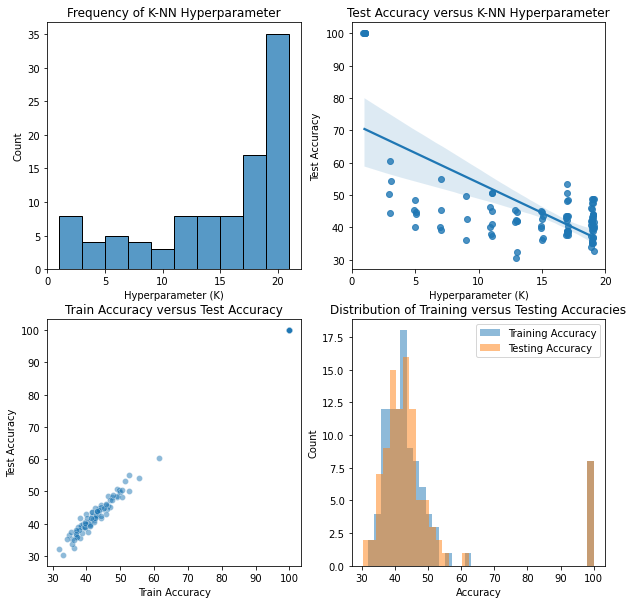

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=data, x='parameters', bins=range(1,22,2), ax=axes[0,0]).set(
    title = 'Frequency of K-NN Hyperparameter',
    xlabel = 'Hyperparameter (K)',
    ylabel = 'Count');
sns.scatterplot(data=data, x='train_accuracy', y='test_accuracy', alpha=0.5, ax=axes[1,0]).set(
    title = 'Train Accuracy versus Test Accuracy',
    xlabel = 'Train Accuracy',
    ylabel = 'Test Accuracy');
sns.regplot(x="parameters", y="test_accuracy", data=data, x_jitter=0.1, ax=axes[0,1]).set(
    title = 'Test Accuracy versus K-NN Hyperparameter',
    xlabel = 'Hyperparameter (K)',
    ylabel = 'Test Accuracy');

plt.hist(data['train_accuracy'], bins=35, alpha=0.5, label="Training Accuracy")
plt.hist(data['test_accuracy'], bins=35, alpha=0.5, label="Testing Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.title("Distribution of Training versus Testing Accuracies")
plt.legend(loc='upper right');

In [22]:
display(data.mean(), data.median())

train_accuracy    47.047714
test_accuracy     47.000000
parameters        13.660000
dtype: float64

train_accuracy    42.728571
test_accuracy     42.600000
parameters        17.000000
dtype: float64

From 100 iterations of random testing, we can see that the average testing accuracy is ~47% with an average k value of 13-14. We can also see that, on average, training accuracy and testing accuracy has a relatively linear relationship, indicating that the difference between our initial testing and training accuracies may be due to random chance.

Interestingly enough, some of these random iterations concluded that the best fit model was a k of 1, resulting in both 100% training and testing accuracy. Looking instead at the median of this data as it is more resiliant against outliers results in a testing accuracy of ~42.6% with a parameter of 17.

In [23]:
print(classification_report(y_test_hat, y_test))

                      precision    recall  f1-score   support

             cannoli       0.65      0.46      0.54       422
             churros       0.20      0.62      0.30        96
           foie_gras       0.47      0.60      0.53       235
pulled_pork_sandwich       0.16      0.84      0.27        57
 spaghetti_carbonara       0.91      0.39      0.55       690

            accuracy                           0.48      1500
           macro avg       0.48      0.59      0.44      1500
        weighted avg       0.69      0.48      0.52      1500



Looking back at our initial KNN model and our five randomly chosen categories, we can conclude that our best food categories were `cannoli` and `spaghetti_carbonara`. From our results of multiple iterations of KNN trained on different groups of food categories, we could see that, when introduced to unseen training data, on average, the models saw relatively similar training and testing accuracies. When it comes to image data, KNN seems to perform better when classifying fewer groups. Though our models still performed relatively well when training on images with large variaton between individual images.

Though our model performed relatively well, it is not ideal for real world use due to the extremely high dimensionality of image data as well as the runtime of testing newly introduced data against all other datapoints. The low precision of many of our classes also leads us to believe that, when classifying images into multiple categories, KNN tends to overfit to one particular class, leading to more predictions for that particular class and a higher false positive rate.

# Convolutional Neural Network

Data preproprocessing, splitting.

In [ ]:
img_dim = 100 #100x100 rehshaped image, b/c neural networks perform well under high dimensionality compared to the previous models.
scaled_X = []
images2 = []

scaleddir2 = 'C:/food-101/food-101/imagesScaled/'
## SAMPLE DATASET
index = 0
for cat in random.sample(categories, 5):
    directory = scaleddir2 + cat    
    path = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        img_resized = resize(toArr, (100, 100,3))
     
        scaled_X.append(img_resized)
        images2.append(categories.index(cat))

scaled_X = np.array(scaled_X)

# ENCODE LABELS AS INTEGERS

le = preprocessing.LabelEncoder()
le.fit(images2)

# CONVERT DATA TO TF.TENSORS

x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(scaled_X, le.transform(images2), test_size=0.3, random_state=42, stratify=le.transform(images2), shuffle = True)
x_train_tensor = tf.convert_to_tensor(x_train_cnn)
x_test_tensor = tf.convert_to_tensor(x_test_cnn)
y_train_tensor = tf.convert_to_tensor(y_train_cnn)
y_test_tensor = tf.convert_to_tensor(y_test_cnn)


MODEL 1: CNN w/ 2 pooling layers

In [6]:

model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #SCC is optimal for multiclass models
              metrics=['accuracy'])
              
model_cnn.summary()

#Trainable params: 1,863,045


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 28224)            

Epoch 1/15
110/110 [==============================] - 19s 172ms/step - loss: 1.2539 - accuracy: 0.5063 - val_loss: 1.3513 - val_accuracy: 0.5020
Epoch 2/15
110/110 [==============================] - 18s 165ms/step - loss: 1.1054 - accuracy: 0.5731 - val_loss: 1.1668 - val_accuracy: 0.5447
Epoch 3/15
110/110 [==============================] - 19s 176ms/step - loss: 0.9907 - accuracy: 0.6311 - val_loss: 1.1465 - val_accuracy: 0.5787
Epoch 4/15
110/110 [==============================] - 19s 168ms/step - loss: 0.8848 - accuracy: 0.6686 - val_loss: 1.0020 - val_accuracy: 0.6447
Epoch 5/15
110/110 [==============================] - 18s 168ms/step - loss: 0.7730 - accuracy: 0.7154 - val_loss: 1.1092 - val_accuracy: 0.6147
Epoch 6/15
110/110 [==============================] - 19s 171ms/step - loss: 0.5942 - accuracy: 0.7783 - val_loss: 1.0883 - val_accuracy: 0.6193
Epoch 7/15
110/110 [==============================] - 19s 171ms/step - loss: 0.4487 - accuracy: 0.8443 - val_loss: 1.1895 - val_ac

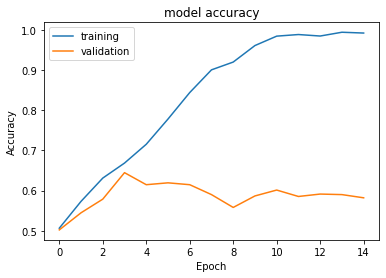

Maximum Validation Accuracy =  0.6446666717529297


In [8]:
history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=15, 
                    validation_data=(x_test_tensor, y_test_tensor))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

MODEL 2: CNN w/ 4 pooling layers

In [9]:


## DEFINE THE MODEL ##

model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (img_dim,img_dim,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'sigmoid'),
        layers.Dense(5),
    ]
)


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #SCC is optimal for multiclass models
              metrics=['accuracy'])

## SUMMARY OF MODEL

model_cnn.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 64)      

Epoch 1/15
110/110 [==============================] - 20s 175ms/step - loss: 1.5816 - accuracy: 0.2594 - val_loss: 1.5182 - val_accuracy: 0.3313
Epoch 2/15
110/110 [==============================] - 19s 174ms/step - loss: 1.3859 - accuracy: 0.4177 - val_loss: 1.5137 - val_accuracy: 0.3427
Epoch 3/15
110/110 [==============================] - 19s 170ms/step - loss: 1.2664 - accuracy: 0.4891 - val_loss: 1.2775 - val_accuracy: 0.4773
Epoch 4/15
110/110 [==============================] - 20s 178ms/step - loss: 1.1504 - accuracy: 0.5520 - val_loss: 1.1911 - val_accuracy: 0.5180
Epoch 5/15
110/110 [==============================] - 19s 174ms/step - loss: 1.0986 - accuracy: 0.5766 - val_loss: 1.1128 - val_accuracy: 0.5593
Epoch 6/15
110/110 [==============================] - 19s 175ms/step - loss: 1.0312 - accuracy: 0.6091 - val_loss: 1.1046 - val_accuracy: 0.5693
Epoch 7/15
110/110 [==============================] - 19s 174ms/step - loss: 0.9863 - accuracy: 0.6234 - val_loss: 1.0213 - val_ac

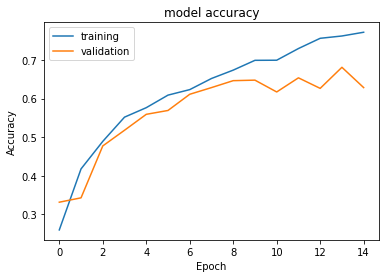

Maximum Validation Accuracy =  0.6813333630561829


In [10]:
#PLOT VALIDATION CURVES AND FIND MAX(VAL_ACCURACY)
history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=15, 
validation_data=(x_test_tensor, y_test_tensor))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

MODEL 3: Increase # of output filters to 64, 128, 128

In [12]:
model_cnn = models.Sequential(
    [
        layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (100,100,3)), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 flatten_4 (Flatten)         (None, 56448)            

Epoch 1/15
110/110 [==============================] - 41s 368ms/step - loss: 1.5195 - accuracy: 0.3391 - val_loss: 1.3225 - val_accuracy: 0.4600
Epoch 2/15
110/110 [==============================] - 40s 365ms/step - loss: 1.2815 - accuracy: 0.4797 - val_loss: 1.2310 - val_accuracy: 0.5053
Epoch 3/15
110/110 [==============================] - 41s 369ms/step - loss: 1.1433 - accuracy: 0.5691 - val_loss: 1.1994 - val_accuracy: 0.5400
Epoch 4/15
110/110 [==============================] - 40s 365ms/step - loss: 1.0554 - accuracy: 0.5966 - val_loss: 1.1682 - val_accuracy: 0.5793
Epoch 5/15
110/110 [==============================] - 41s 377ms/step - loss: 0.9677 - accuracy: 0.6329 - val_loss: 1.1179 - val_accuracy: 0.5793
Epoch 6/15
110/110 [==============================] - 42s 386ms/step - loss: 0.8612 - accuracy: 0.6803 - val_loss: 1.1444 - val_accuracy: 0.5893
Epoch 7/15
110/110 [==============================] - 39s 356ms/step - loss: 0.7293 - accuracy: 0.7211 - val_loss: 1.1371 - val_ac

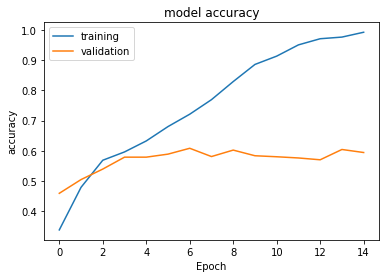

Maximum Validation Accuracy =  0.6086666584014893


In [13]:
#Validation Curves
history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=15, 
validation_data=(x_test_tensor, y_test_tensor))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

The CNN model (Model 2) with 4 pooling layers achieved the highest validation accuracy of ~0.6813 on epoch #14. This model had 146,949 traiable parameters, which is considerable less than models 2 and 3, which have 1,863,045 and 3,836,293 trainable parameters, respectively. Model 3 had roughly twice the runtime of models 1 and 2, yet yielded lower validation accuracy. Thus, in this scenario, increasing the output channels of the CNN greatly increases training time complexity yet had no increase in validation accuracy. 

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
